In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [17]:
cancer = pd.DataFrame(data=pd.read_csv('data.csv'))
cancer = cancer.drop(['Unnamed: 32'], axis=1)
cancer['diagnosis'] = cancer['diagnosis'].map({'M':0, 'B':1})
X_train = cancer.drop(['diagnosis'], axis=1)
X_train = X_train.drop(['id'], axis=1)
X_test = X_train.iloc[375:569]
y_test = cancer['diagnosis'][375:569]
X_train = X_train.iloc[0:375]
y_train = cancer['diagnosis'][0:375]

In [18]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [19]:
prediction = knn.predict(X_test)

In [20]:
#sns.pairplot(X_train.iloc[:, 0:10], kind='scatter');

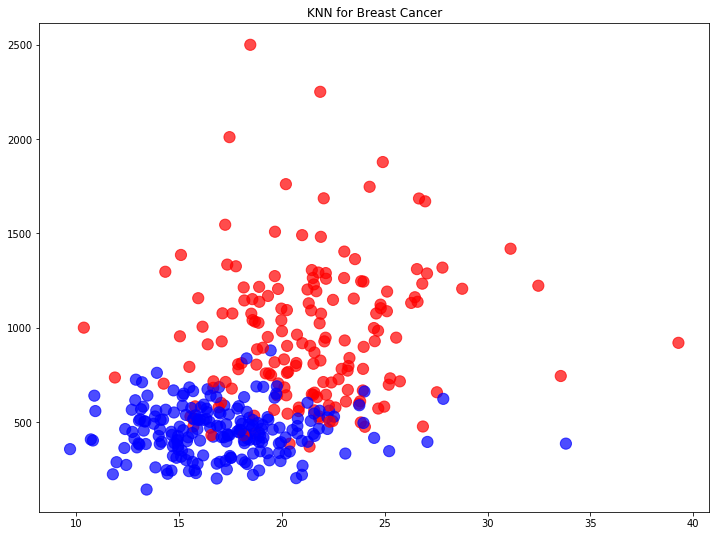

In [21]:
plt.scatter(X_train.iloc[:, 1], X_train.iloc[:, 3], 
            c=y_train, s=125, alpha=.7, 
            cmap=ListedColormap(['red', 'blue']), marker='o');
plt.title('KNN for Breast Cancer');

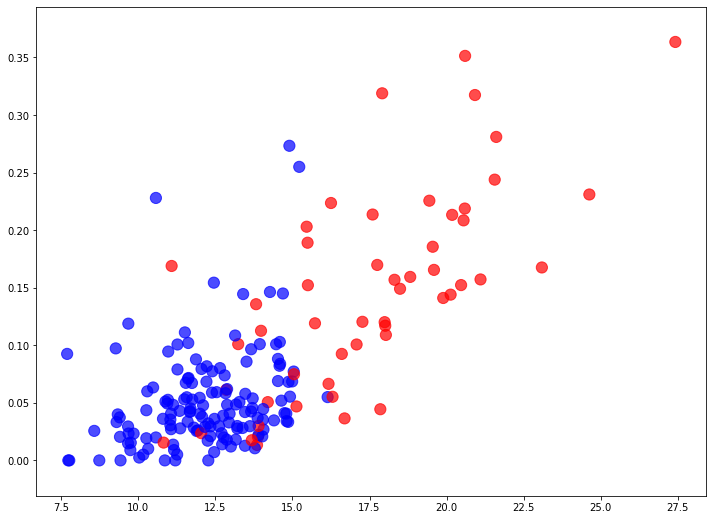

In [22]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 6], 
           c=prediction, s=125, alpha=.7, 
            cmap=ListedColormap(['red', 'blue']), marker='o');

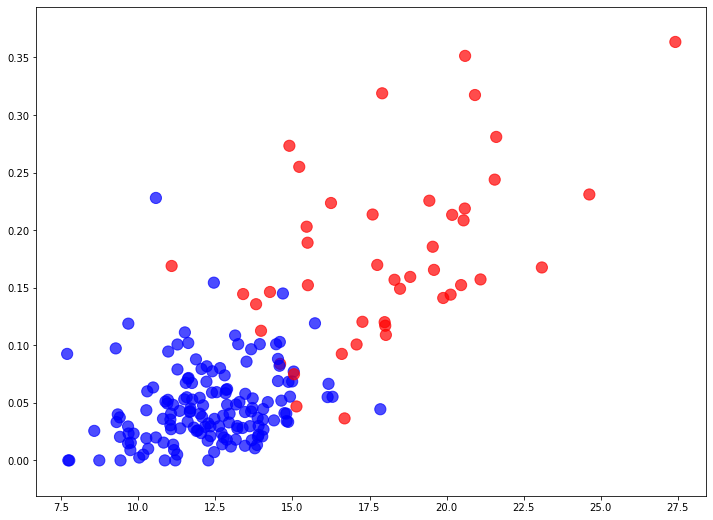

In [23]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 6], 
           c=y_test, s=125, alpha=.7, 
            cmap=ListedColormap(['red', 'blue']), marker='o');

In [41]:
accuracy_score(y_test, prediction)

0.9329896907216495